In [1]:
#setting up 

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns
np.random.seed(123)  # fix the seed at the beginning and only once.
import time
# import os
# os.chdir('C:/Users/rodri/Dropbox/Programming for Economics/Lecture Notes')
# from functions_albert import gauss_hermite_1d  # you need to save the file in your Working directory.
import seaborn as sns
import quantecon as qe   #first you need to install the quantecon package: here is how https://anaconda.org/conda-forge/quantecon
import scipy.stats as stats
def gini(array):
    #from: https://github.com/oliviaguest/gini
    #http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm 
    array = np.array(array)
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array += np.amin(array) #non-negative
    array += 0.0000001 #non-0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) 
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) 

# Exercise 1 

Prove that the OLS estimator is distributed asymptotically normal using Monte Carlo simulation.
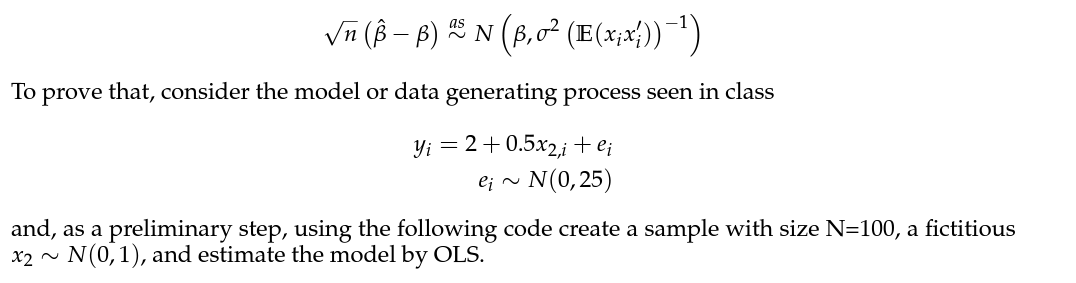


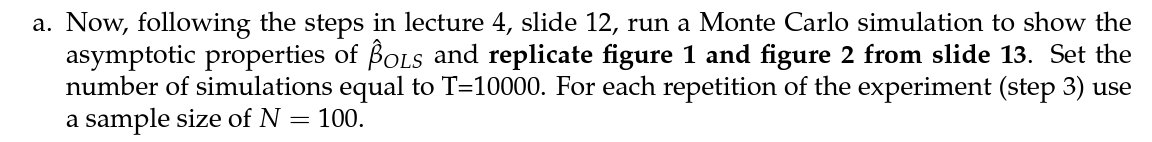

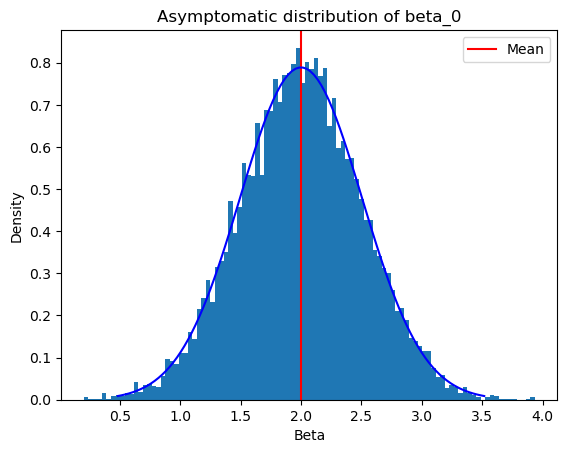

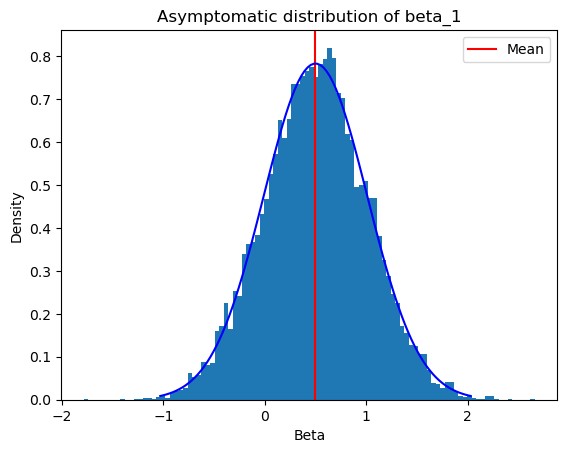

In [2]:
# 1a 
np.random.seed(123) 
T = 10000 #change
beta1s = []
beta0s = []

#Monte carlo simulations function:
def montecarlo_estimates(N,T=10000 ):
    '''Function that outputs 2 arrays: 
    1) array of simulated beta_0 estimates
    2)array of simulated beta_1 estimates '''
    beta1s = []
    beta0s = []
    for i in range(0,T):
        sigma_e = 5 
        x2 = np.random.normal(0,1,N); 
        e = np.random.normal(0,sigma_e,N) 
        y1 = 2 + 0.5*x2 +e 
        X = sm.add_constant(x2) #indicates there is a "b" constant in the equation
        ols = sm.OLS(y1,X).fit() 
        beta1 = ols.params[1] #extract the slope coefficient 
        beta0 = ols.params[0]
        beta1s.append(beta1)
        beta0s.append(beta0)

    return beta0s, beta1s

beta0s = montecarlo_estimates(N=100)[0]
beta1s = montecarlo_estimates(N=100)[1]



#replicate graphs from slide 13 
beta_list = [ beta0s, beta1s]
titles = ['Asymptomatic distribution of beta_0','Asymptomatic distribution of beta_1']

for i in range(0,2):
    plt.hist(beta_list[i], bins=100, density=True)
    # Calculate mean and standard deviation of beta estimates
    mean = np.mean(beta_list[i])
    std = np.std(beta_list[i])
    plt.axvline(mean, color='red', label='Mean') #add mean line
    #add distribution line
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    pdf = stats.norm.pdf(x, mean, std)
    plt.plot(x, pdf, color='blue')
    plt.xlabel('Beta')
    plt.ylabel("Density")
    plt.title(titles[i])
    plt.legend()
    plt.show()


### 1b 
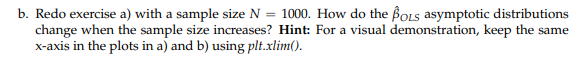


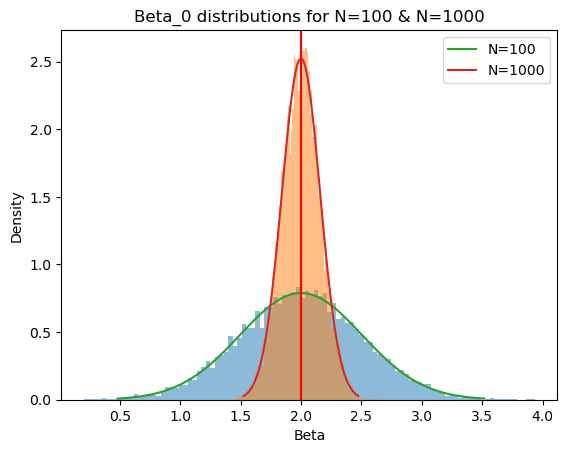

In [3]:

#define Lists 
np.random.seed(123) 
beta_n100 = montecarlo_estimates(N=100)
beta_n1000 = montecarlo_estimates(N=1000)
beta0_list = [beta_n100[0],beta_n1000[0]]
beta1_list = [beta_n100[1],beta_n1000[1]]

#plotting for beta_0 
plt.hist(beta_n100[0], bins=100,alpha = 0.5, density=True)
plt.hist(beta_n1000[0], bins=100,alpha = 0.5, density=True)
#adds the mean and distribution line
Nlist = ['N=100', 'N=1000']
for i in range(0,2):
    mean = np.mean(beta0_list[i])
    std = np.std(beta0_list[i])
    plt.axvline(mean, color='red') #add mean line
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    pdf = stats.norm.pdf(x, mean, std)
    plt.plot(x, pdf, label = Nlist[i])

plt.xlabel('Beta')
plt.ylabel("Density")
plt.title('Beta_0 distributions for N=100 & N=1000')
plt.legend()
plt.xlim 
plt.show()


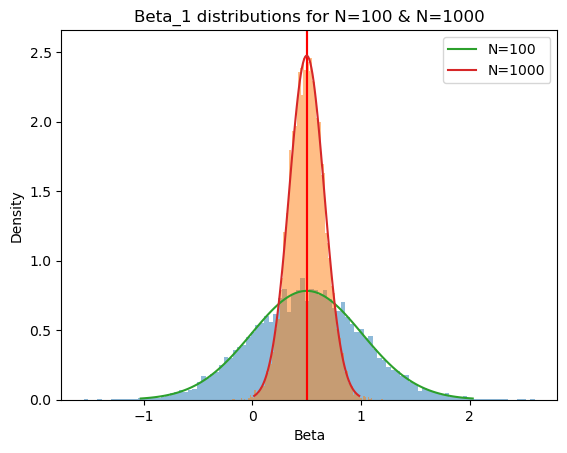

In [4]:
#plotting for beta_1
np.random.seed(123) 
plt.hist(beta_n100[1], bins=100,alpha = 0.5, density=True)
plt.hist(beta_n1000[1], bins=100,alpha = 0.5, density=True)
#adds the mean and distribution line
Nlist = ['N=100', 'N=1000']
for i in range(0,2):
    mean = np.mean(beta1_list[i])
    std = np.std(beta1_list[i])
    plt.axvline(mean, color='red') #add mean line
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    pdf = stats.norm.pdf(x, mean, std)
    plt.plot(x, pdf, label = Nlist[i])

plt.xlabel('Beta')
plt.ylabel("Density")
plt.title('Beta_1 distributions for N=100 & N=1000')
plt.legend()
plt.xlim 
plt.show()


As the sample size increases, the spread and the asymptotic distribution of both $\hat{\beta}$'s  becomes concentrated around the true value of $\beta$. This follows the Central Limit Theorem, the distribution for large numbers of $i.i.d$ random variables approaches a normal distribution. 

# Exercise 2

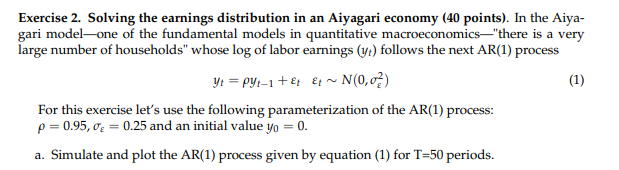

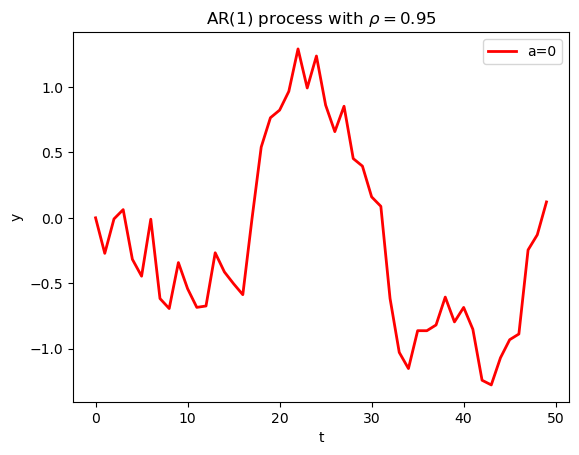

In [5]:
#2a
#setup
np.random.seed(123) 
rho = 0.95
sigma_e = 0.25 #standard dev not var
a = 0
T = 50

def ar_1_sim(T,rho,y0=0,a=0,sigma_e=0.25):
    ''' 
    ar_1_sim simulates for T periods an AR(1) process of the following form:
                y_t+1 = a + rho*y_t + e_t
                where e_t ~ N (0,sigma_e)
    '''
    y = np.empty(T)
    y[0] = y0
    for i in range(1,T):
        e = np.random.normal(0,sigma_e,1) 
        y[i] = a+ rho*y[i-1]+e
   
    return y

y1 = ar_1_sim(T = 50, rho = 0.95)

#plotting
fig, ax = plt.subplots()
ax.plot(range(0,T), y1, linewidth=2.0, color='r',label='a=0')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title(r'AR(1) process with $\rho=0.95$')
ax.legend()
plt.show()

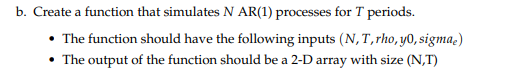

In [6]:
np.random.seed(123)

#columns = N
#rows = T
def simulate_AR1(N,T,rho,y0,sigma_e):
    '''function that simulates N AR(1) processes for T periods
     simulate_AR1(N,T,rho,y0,sigma_e)'''
    
    sims = []

    for i in range(0,N): # loop through columns 
        y = np.empty(T)
        y[0] = y0
        for i in range(1,T): #loop through rows
            e = np.random.normal(0,sigma_e,1) 
            y[i] = a+ rho*y[i-1]+e
        sims.append(y)

    sims_arr = np.array(sims)

    
    return sims_arr.transpose()#transpose so 1 column corresponds with 1 simulation's data 

#simulate_AR1(4,5,0.23,0,1)
#check dimensions
# np.shape( simulate_AR1(N=4,T = 5,0.23,0,1) )
#check data type 
# simulate_AR1(4,5,0.23,0,1)


# checking stuff 
# type(simulate_AR1(4,5,0.23,0,1))
# x = simulate_AR1(4,5,0.23,0,1)
# print(x)
# print(np.shape(x))


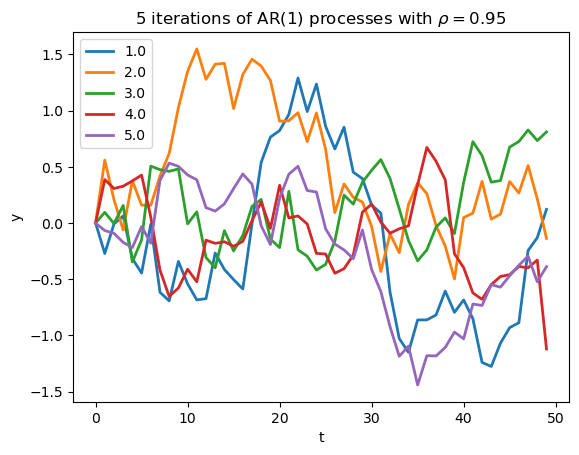

In [7]:
#    '''function that simulates N AR(1) processes for T periods
#     arguments of function : simulate_AR1(N,T,rho,y0,sigma_e)''
T = 50
np.random.seed(123) 
y2 = simulate_AR1(5,50,0.95,0,0.25)

#plotting
labels = np.linspace(1,5,5)
fig, ax = plt.subplots()
for i in range(0,5):
    ax.plot(range(0,T), y2[:, i], linewidth=2.0,label=labels[i])

ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title(r'5 iterations of AR(1) processes with $\rho=0.95$ ')
ax.legend()
plt.show()


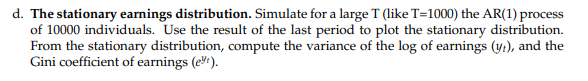

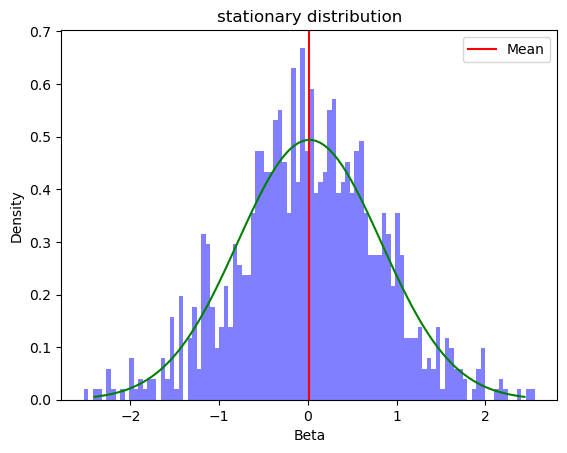

In [8]:
#simulate for a large T the AR(1) process for 10000 individuals, plot the stationary distribution
#    '''function that simulates N AR(1) processes for T periods
#     simulate_AR1(N,T,rho,y0,sigma_e)''

#runtime takes 50 seconds 
np.random.seed(123)

y3 = simulate_AR1(1000,100,0.95,0,0.25)[-1,:] #calls the last row #change back to simulate_AR1(10000,1000,0.95,0,0.25)
np.shape(y3)
type(y3)

#plotting
plt.hist(y3, bins=100, density=True, color='blue', alpha = 0.5)
# Calculate mean and standard deviation of beta estimates
mean = np.mean(y3)
std = np.std(y3)
plt.axvline(mean, color='red', label='Mean') #add mean line
#add distribution line
x = np.linspace(mean - 3*std, mean + 3*std, 100)
pdf = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf, color='green')
plt.xlabel('Beta')
plt.ylabel("Density")
plt.title('stationary distribution')
plt.legend()
plt.show()



In [9]:
#From the stationary distribution, compute the variance of the log of earnings (yt), and the
#Gini coefficient of earnings (eyt )./

vars = np.var(y3)
print('Variance of the log of earnings (yt) ; ',vars)

#Gini coefficient of earnings (eyt )./
gini_y3 = gini(np.exp(y3))
print('Gini coefficient of earnings (e^y_t) ; ', gini_y3)

Variance of the log of earnings (yt) ;  0.6520734100733461
Gini coefficient of earnings (e^y_t) ;  0.43052021965060766



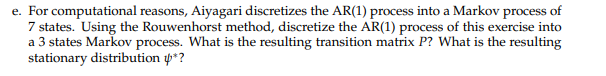

In [10]:
mean_y3 = np.mean(y3)
print('mean of Ar(1) y3:', mean_y3)  # approx mu* = a/(1-rho) =

mean of Ar(1) y3: 0.01912895604344009


In [11]:
from quantecon import rouwenhorst
#rouwenhorst arguments :  rouwenhorst(n, ybar, sigma, rho)

mc_ar1 = rouwenhorst(n = 3, ybar = 0, sigma=0.25,rho = 0.95)
P1 = mc_ar1.P
psi2_star = mc_ar1.stationary_distributions
y2_values = mc_ar1.state_values

print("Transition matrix: \n")
print(P1)
print("\n Stationary distribution: ")
print(psi2_star)
print("\n Standard deviation: ")
print(y2_values)



Transition matrix: 

[[9.50625e-01 4.87500e-02 6.25000e-04]
 [2.43750e-02 9.51250e-01 2.43750e-02]
 [6.25000e-04 4.87500e-02 9.50625e-01]]

 Stationary distribution: 
[[0.25 0.5  0.25]]

 Standard deviation: 
[-1.13227703  0.          1.13227703]


# Exercise 3 
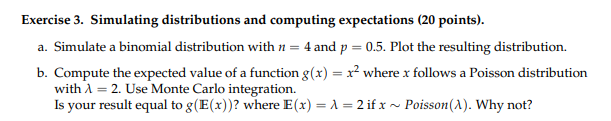

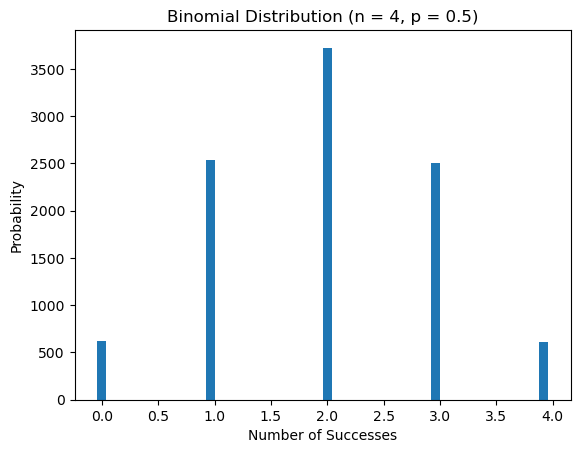

In [12]:
# Generate the binomial distribution
np.random.seed(123)
n = 4
p = 0.5
X = np.random.binomial(n, p, size=10000)

# Plot the resulting distribution
plt.hist(X, bins=50, align='left')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution (n = 4, p = 0.5)')
plt.show()

In [13]:
#3b
np.random.seed(123)
N = 10000 #sample size 
sample = np.random.poisson(2, N) # Generate samples from the Poisson distribution
gx = sample**2 #  g(x) for each sample
expected_value = np.mean(gx)
print("Expected value:", expected_value)


Expected value: 5.9791


In this case, $E(x) = λ = 2$ if $x ∼ \textnormal{Poisson}(λ)$, so the expected value of $g(x) = x^{2}$ is $ g(E(x)) = g(2) = 4$. The result obtained through Monte Carlo integration should be close to $4$. This is however not the case. Monte carlo integration only gives us an approximation of $g(E(x))$, there exists error from the small number of samples used, ,variance from the function $g$ and distribution of the r.v $x$ , if the number of samples goes to infinity we expect it to converge to $4$ instead.

# Exercise 4

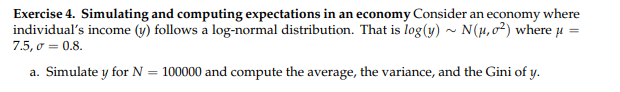

In [14]:
# simulate the log-normal distribution
np.random.seed(123)
y_i = np.random.lognormal(mean=7.5, sigma=0.8, size=100000)

# compute the average, variance, and Gini coefficient
avg = np.mean(y_i )
var = np.var(y_i )
gini_y = gini(y_i )
print("The average of the log of earnings is", avg)
print("The variance of the log of earnings is", var)
print("The Gini coefficient of the log of earnings is", gini_y)


The average of the log of earnings is 2491.9398763363242
The variance of the log of earnings is 5537187.597554172
The Gini coefficient of the log of earnings is 0.4283974228152367


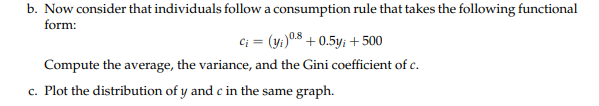

In [15]:
c_i = (y_i)**0.8 + 0.5*(y_i) + 500

avg = np.mean(c_i)
var = np.var(c_i )
gini_y = gini(c_i )
print("The average consumption is", avg)
print("The variance of consumption is", var)
print("The Gini coefficient of consumption is", gini_y)

The average consumption is 2241.445485582511
The variance of consumption is 2330419.448698821
The Gini coefficient of consumption is 0.3153246493149168


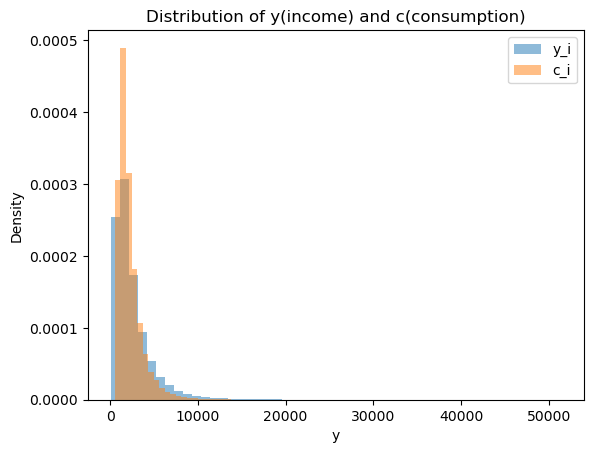

In [16]:
#plotting 
plt.hist(y_i, bins=50, density=True, alpha = 0.5,label = 'y_i')
plt.hist(c_i, bins=50, density=True, alpha = 0.5,label = 'c_i')
plt.title("Distribution of y(income) and c(consumption)")
plt.xlabel("y")
plt.ylabel("Density")
plt.legend()
plt.show()